In [26]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import pandas as pd
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn import datasets
from tensorflow import keras
np.set_printoptions(threshold=np.inf)

In [73]:
directory = './samples/'

target_filenames = ['100.csv', '150.csv', '200.csv', '250.csv','280.csv', '300.csv', '350.csv', '400.csv']
x,y=[],[]
for filename in target_filenames:
    filepath = os.path.join(directory, filename)
    if os.path.isfile(filepath):  # Check if the file exists
        f = pd.read_csv(filepath, delimiter='\t')
        x.append(f.drop(columns=['channel', 'experimental', 'smoothed', 'Au', '197Au']).values)
        y.append(int(filename.replace('.csv', '')))  # Extract the numeric value from the filename

print("X Data:")
for data in x:
    print(data)
print("\nY Labels:", y)

X Data:
[[0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [

In [74]:
Xx = []
for array in x:
    min_val = np.min(array)
    max_val = np.max(array)
    normalized_array = (array - min_val) / (max_val - min_val)
    Xx.append(normalized_array)

X = np.array(Xx)
Y = np.array(y)
print(Y)

[100 150 200 250 280 300 350 400]


In [75]:
x_train, x_test, labels_train, labels_test = train_test_split(X, Y, test_size = 1, random_state = 2)

print('Numero de espetros: '+ str(len(X)))
print('Numero de bins em cada espetro: '+str(len(X[0])))
print("Normalized test spectrum\n", x_test)
print('\n')
print("Label test\n", labels_test)

Numero de espetros: 8
Numero de bins em cada espetro: 1878
<class 'numpy.ndarray'>
Normalized test spectrum
 [[[0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00

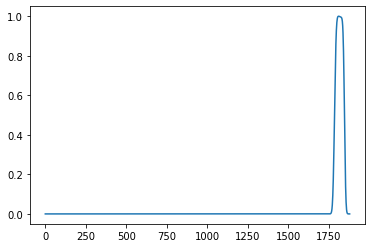

In [76]:
plt.plot(np.arange(1,1879), x_test[0])

In [80]:
model=keras.models.Sequential(
    [keras.layers.Dense(64,activation='relu',input_shape=(1878,)),
     keras.layers.Dense(32,activation='relu'),
     keras.layers.Dense(1,activation='linear')]
     )

model.compile(
    loss='mean_squared_error', optimizer='adam', metrics=['mae']
)

epochs = 400
batch_size = 32

In [81]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 64)                120256    
                                                                 
 dense_34 (Dense)            (None, 32)                2080      
                                                                 
 dense_35 (Dense)            (None, 1)                 33        
                                                                 
Total params: 122369 (478.00 KB)
Trainable params: 122369 (478.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [82]:
model.fit(x_train,labels_train,epochs=epochs,batch_size=batch_size)

Epoch 1/400
1/1 [==============================] - 1s 1s/step - loss: 72468.5000 - mae: 249.9477
Epoch 2/400
1/1 [==============================] - 0s 16ms/step - loss: 72365.7656 - mae: 249.7691
Epoch 3/400
1/1 [==============================] - 0s 23ms/step - loss: 72264.2031 - mae: 249.5918
Epoch 4/400
1/1 [==============================] - 0s 14ms/step - loss: 72163.0234 - mae: 249.4127
Epoch 5/400
1/1 [==============================] - 0s 17ms/step - loss: 72064.2422 - mae: 249.2362
Epoch 6/400
1/1 [==============================] - 0s 15ms/step - loss: 71967.1484 - mae: 249.0611
Epoch 7/400
1/1 [==============================] - 0s 14ms/step - loss: 71868.7656 - mae: 248.8836
Epoch 8/400
1/1 [==============================] - 0s 12ms/step - loss: 71766.6797 - mae: 248.7011
Epoch 9/400
1/1 [==============================] - 0s 13ms/step - loss: 71659.3125 - mae: 248.5092
Epoch 10/400
1/1 [==============================] - 0s 23ms/step - loss: 71546.7500 - mae: 248.3076
Epoch 11/40

In [83]:
loss, mae = model.evaluate(x_test, labels_test)
print("Mean Absolute Error:", mae)

1/1 [==============================] - 0s 180ms/step - loss: 1.3271 - mae: 1.1520
Mean Absolute Error: 1.152008056640625


In [84]:
predict= model.prediction(x_test)
print(predict)

AttributeError: 'Sequential' object has no attribute 'prediction'

# Test with OLE usage

In [66]:
with open('data.txt', 'r') as file:
    input_string = file.read()
lines = input_string.split('\n')
x = []

for line in lines:
    values = line.split()  # Split line into individual values (space-separated)
    int_values = [float(value) for value in values]  # Convert string values to list of single integers
    x.append(int_values)

del x[len(x)-1]
print(x)
y=[100,150,200,250,300,350,400,450,500]

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

In [67]:
Xx=[]
for array in x:
    min_val = np.min(array)
    max_val = np.max(array)
    normalized_array = (array - min_val) / (max_val - min_val)
    Xx.append(normalized_array)

X=np.array(Xx)
Y=np.array(y)

In [68]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=1,random_state=2)
print(y_test)

[300]


In [69]:
model=keras.models.Sequential(
    [keras.layers.Dense(100,activation='relu',input_shape=(1878,)),
     keras.layers.Dense(50,activation='relu'),
     keras.layers.Dense(1,activation='linear')]
     )

model.compile(
    loss='mean_squared_error', optimizer='adam', metrics=['mae']
)

epochs = 200
batch_size = 32

In [70]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 100)               187900    
                                                                 
 dense_28 (Dense)            (None, 50)                5050      
                                                                 
 dense_29 (Dense)            (None, 1)                 51        
                                                                 
Total params: 193001 (753.91 KB)
Trainable params: 193001 (753.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [71]:
model.fit(x_train,labels_train,epochs=epochs,batch_size=batch_size)

Epoch 1/200
1/1 [==============================] - 1s 1s/step - loss: 72619.9922 - mae: 250.2326
Epoch 2/200
1/1 [==============================] - 0s 10ms/step - loss: 72493.5547 - mae: 249.9995
Epoch 3/200
1/1 [==============================] - 0s 14ms/step - loss: 72379.0469 - mae: 249.7878
Epoch 4/200
1/1 [==============================] - 0s 19ms/step - loss: 72273.7969 - mae: 249.5982
Epoch 5/200
1/1 [==============================] - 0s 13ms/step - loss: 72168.3516 - mae: 249.4088
Epoch 6/200
1/1 [==============================] - 0s 24ms/step - loss: 72062.7188 - mae: 249.2215
Epoch 7/200
1/1 [==============================] - 0s 13ms/step - loss: 71960.2812 - mae: 249.0392
Epoch 8/200
1/1 [==============================] - 0s 13ms/step - loss: 71854.1016 - mae: 248.8518
Epoch 9/200
1/1 [==============================] - 0s 21ms/step - loss: 71745.4531 - mae: 248.6604
Epoch 10/200
1/1 [==============================] - 0s 13ms/step - loss: 71628.6484 - mae: 248.4548
Epoch 11/20

In [72]:
loss, mae = model.evaluate(x_test, labels_test)
print("Mean Absolute Error:", mae)

1/1 [==============================] - 0s 196ms/step - loss: 1.2625 - mae: 1.1236
Mean Absolute Error: 1.123626708984375
